In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/most-runs-in-cricket/most_runs_in_cricket.csv


In [2]:
df=pd.read_csv('../input/most-runs-in-cricket/most_runs_in_cricket.csv',parse_dates=['Span'])
df

,Unnamed: 0,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s
0,0,SR Tendulkar (INDIA),1989-2013,664,782,74,34357,248,48.52,50817+,67.58,100,164,34,4076,264
1,1,KC Sangakkara (Asia/ICC/SL),2000-2015,594,666,67,28016,319,46.77,42086,66.56,63,153,28,3015,159
2,2,RT Ponting (AUS/ICC),1995-2012,560,668,70,27483,257,45.95,40130,68.48,71,146,39,2781,246
3,3,DPMD Jayawardene (Asia/SL),1997-2015,652,725,62,25957,374,39.15,40100,64.73,54,136,47,2679,170
4,4,JH Kallis (Afr/ICC/SA),1995-2014,519,617,97,25534,224,49.10,45346,56.30,62,149,33,2455,254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,83,DB Vengsarkar (INDIA),1976-1992,245,305,41,10376,166,39.30,15989+,50.04,18,58,22,737,41
84,84,ME Trescothick (ENG),2000-2006,202,268,16,10326,219,40.97,15903,64.93,26,52,25,1382,84
85,85,G Gambhir (INDIA),2003-2016,242,283,18,10324,206,38.95,14994,68.85,20,63,20,1188,37
86,86,MD Crowe (NZ),1982-1995,220,271,29,10148,299,41.93,18666,54.36,21,52,12,1037,56


In [3]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [4]:
df

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s
0,SR Tendulkar (INDIA),1989-2013,664,782,74,34357,248,48.52,50817+,67.58,100,164,34,4076,264
1,KC Sangakkara (Asia/ICC/SL),2000-2015,594,666,67,28016,319,46.77,42086,66.56,63,153,28,3015,159
2,RT Ponting (AUS/ICC),1995-2012,560,668,70,27483,257,45.95,40130,68.48,71,146,39,2781,246
3,DPMD Jayawardene (Asia/SL),1997-2015,652,725,62,25957,374,39.15,40100,64.73,54,136,47,2679,170
4,JH Kallis (Afr/ICC/SA),1995-2014,519,617,97,25534,224,49.10,45346,56.30,62,149,33,2455,254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,DB Vengsarkar (INDIA),1976-1992,245,305,41,10376,166,39.30,15989+,50.04,18,58,22,737,41
84,ME Trescothick (ENG),2000-2006,202,268,16,10326,219,40.97,15903,64.93,26,52,25,1382,84
85,G Gambhir (INDIA),2003-2016,242,283,18,10324,206,38.95,14994,68.85,20,63,20,1188,37
86,MD Crowe (NZ),1982-1995,220,271,29,10148,299,41.93,18666,54.36,21,52,12,1037,56


In [5]:
top_five_highest_runs = df[['Player','Runs']].sort_values(by='Runs',ascending=False)[:5]
top_five_highest_runs

,Player,Runs
0,SR Tendulkar (INDIA),34357
1,KC Sangakkara (Asia/ICC/SL),28016
2,RT Ponting (AUS/ICC),27483
3,DPMD Jayawardene (Asia/SL),25957
4,JH Kallis (Afr/ICC/SA),25534


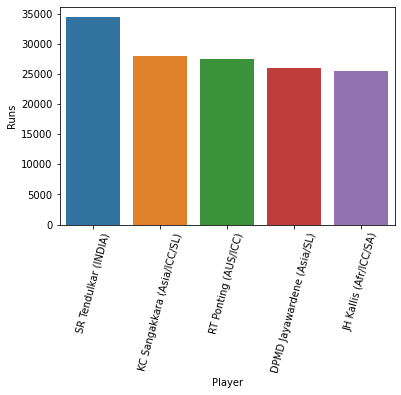

In [6]:
sns.barplot(x='Player',y='Runs',data=top_five_highest_runs)
plt.xticks(rotation=75)
plt.show()

In [7]:
top_five_matches=df[['Player','Mat']].sort_values(by='Mat',ascending=False)[:5]
top_five_matches

,Player,Mat
0,SR Tendulkar (INDIA),664
3,DPMD Jayawardene (Asia/SL),652
1,KC Sangakkara (Asia/ICC/SL),594
8,ST Jayasuriya (Asia/SL),586
2,RT Ponting (AUS/ICC),560


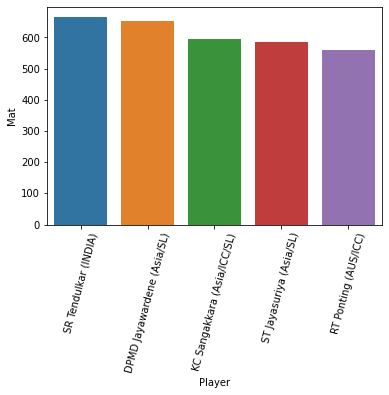

In [8]:
sns.barplot(x='Player',y='Mat',data=top_five_matches)
plt.xticks(rotation=75)
plt.show()

In [9]:
top_five_hs= df[['Player','HS']].sort_values(by='HS',ascending=False)[:5]
top_five_hs

,Player,HS
7,BC Lara (ICC/WI),400
38,ML Hayden (AUS/ICC),380
3,DPMD Jayawardene (Asia/SL),374
8,ST Jayasuriya (Asia/SL),340
27,DA Warner (AUS),335


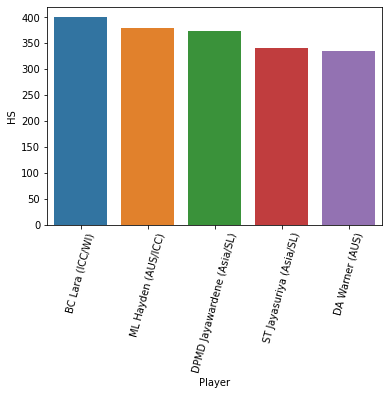

In [10]:
sns.barplot(x='Player',y='HS',data=top_five_hs)
plt.xticks(rotation=75)
plt.show()

In [11]:
top_five_not_out= df[['Player','NO']].sort_values(by='NO',ascending=False)[:5]
top_five_not_out

,Player,NO
22,MS Dhoni (Asia/INDIA),142
15,SR Waugh (AUS),104
4,JH Kallis (Afr/ICC/SA),97
9,S Chanderpaul (WI),94
44,AD Mathews (SL),90


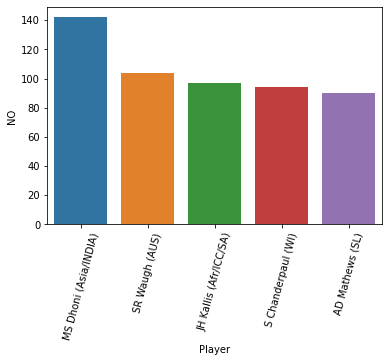

In [12]:
sns.barplot(x='Player',y='NO',data=top_five_not_out)
plt.xticks(rotation=75)
plt.show()

In [13]:
top_five_four= df[['Player','4s']].sort_values(by='4s',ascending=False)[:5]
top_five_four

,Player,4s
0,SR Tendulkar (INDIA),4076
1,KC Sangakkara (Asia/ICC/SL),3015
2,RT Ponting (AUS/ICC),2781
3,DPMD Jayawardene (Asia/SL),2679
5,R Dravid (Asia/ICC/INDIA),2604


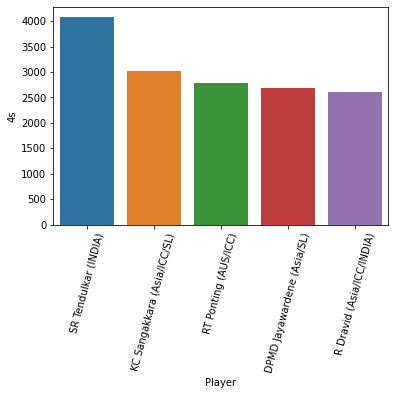

In [14]:
sns.barplot(x='Player',y='4s',data=top_five_four)
plt.xticks(rotation=75)
plt.show()

In [15]:
top_five_sixes= df[['Player','6s']].sort_values(by='6s',ascending=False)[:5]
top_five_sixes

,Player,6s
12,CH Gayle (ICC/WI),553
28,RG Sharma (INDIA),492
71,Shahid Afridi (Asia/ICC/PAK),476
40,BB McCullum (NZ),398
48,MJ Guptill (NZ),383


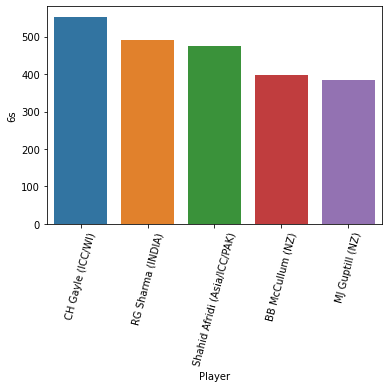

In [16]:
sns.barplot(x='Player',y='6s',data=top_five_sixes)
plt.xticks(rotation=75)
plt.show()

In [17]:
top_five_century= df[['Player','100']].sort_values(by='100',ascending=False)[:5]
top_five_century

,Player,100
0,SR Tendulkar (INDIA),100
2,RT Ponting (AUS/ICC),71
6,V Kohli (INDIA),71
1,KC Sangakkara (Asia/ICC/SL),63
4,JH Kallis (Afr/ICC/SA),62


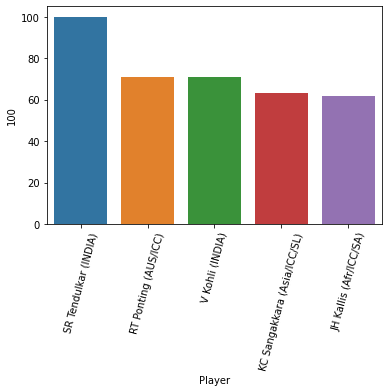

In [18]:
sns.barplot(x='Player',y='100',data=top_five_century)
plt.xticks(rotation=75)
plt.show()